# PRÁCTICA N°7

##### **TEMA:** _CLUSTERING- APRENDIZAJE NO SUPERVISADO_

##### **INTEGRANTES:** 
#####                 _José Cueva_
#####                 _Estefanía Quimbiulco_

**Objetivos**
+ Analizar un dataset no etiquetado es decir sin variable de salida mediante
algoritmos de aprendizaje no supervisado.
+ Emplear Técnicas de Clustering o agrupamiento para clasificar los registros de
un dataset no eteiquetado.
+ Familiarizarse con el uso de phyton para realizar el análisis de un dataset
aplicando las librerías de modelado de datos.



In [1]:
import pandas as pd

In [2]:
path="EstacionesClimaticas.csv"

In [3]:
df=pd.read_csv(path)

**1. Análisis general y limpieza del dataset:**


Determinar el **tamaño** del dataset (Número de Registros y número de variables).

In [4]:
df.shape
# 1189 registros y 15 variables

(1189, 15)

Determinar el **tipo de dato** de cada una de las variables del dataset.

In [5]:
df.dtypes

Unnamed: 0                   int64
Nombre_Estacion             object
Latitud                    float64
Longitud                   float64
Temperatura-Media          float64
Periodo-STM                float64
Temperatura-Mensual-Max    float64
Periodo-STMV               float64
Temperatura-Mensual-Min    float64
Periodo-STmV               float64
Periodo-no-Nevado          float64
Precipitación-Total        float64
Periodo-SPV                float64
Nivel-Nieve                float64
Estacion-num                object
dtype: object

Verificar si existen **datos faltantes** en el dataset. 

In [6]:
import numpy as np

In [7]:
datos_faltantes=df.isnull()
for column in datos_faltantes.columns.values.tolist():
    print(column)
    print(datos_faltantes[column].value_counts())
    print("")

Unnamed: 0
False    1189
Name: Unnamed: 0, dtype: int64

Nombre_Estacion
False    1189
Name: Nombre_Estacion, dtype: int64

Latitud
False    1189
Name: Latitud, dtype: int64

Longitud
False    1189
Name: Longitud, dtype: int64

Temperatura-Media
False    1189
Name: Temperatura-Media, dtype: int64

Periodo-STM
False    1189
Name: Periodo-STM, dtype: int64

Temperatura-Mensual-Max
False    1189
Name: Temperatura-Mensual-Max, dtype: int64

Periodo-STMV
False    1189
Name: Periodo-STMV, dtype: int64

Temperatura-Mensual-Min
False    1188
True        1
Name: Temperatura-Mensual-Min, dtype: int64

Periodo-STmV
False    1188
True        1
Name: Periodo-STmV, dtype: int64

Periodo-no-Nevado
True     687
False    502
Name: Periodo-no-Nevado, dtype: int64

Precipitación-Total
False    1099
True       90
Name: Precipitación-Total, dtype: int64

Periodo-SPV
False    1099
True       90
Name: Periodo-SPV, dtype: int64

Nivel-Nieve
False    702
True     487
Name: Nivel-Nieve, dtype: int64

Estacion-n

Tratar los **datos faltantes**, es decir reemplazar con algún valor común o
eliminar los registros que presenten celdas con datos faltantes. Justificar el
procedimiento seleccionado.

In [8]:
media1=df["Temperatura-Mensual-Min"].mean()
media2=df["Periodo-STmV"].mean()
media3=df["Periodo-no-Nevado"].mean()
media4=df["Precipitación-Total"].mean()
media5=df["Periodo-SPV"].mean()
media6=df["Nivel-Nieve"].mean()

In [9]:
df["Temperatura-Mensual-Min"]=df["Temperatura-Mensual-Min"].replace(np.NaN,media1)
df["Periodo-STmV"]=df["Periodo-STmV"].replace(np.NaN,media2)
df["Periodo-no-Nevado"]=df["Periodo-no-Nevado"].replace(np.NaN,media3)
df["Precipitación-Total"]=df["Precipitación-Total"].replace(np.NaN,media4)
df["Periodo-SPV"]=df["Periodo-SPV"].replace(np.NaN,media5)
df["Nivel-Nieve"]=df["Nivel-Nieve"].replace(np.NaN,media6)

In [11]:
#Reemplazamos los datos faltantes por la media, debido a que si se elimina los registros , se elimina más del 50% del dataset, 
#lo cual no sería factible, ya que se perderían registros importantes de nuestro conjuntos de datos.

Modificar el **tipo de dato** de las variables de entrada que considere necesario.
Justificar el cambio.

In [12]:
#No se necesita cambiar el tipo de dato, ya que sus datos tienen float en valores numéricos y object en string

Verificar nuevamente el **tamaño** del dataset después de la fase de análisis y
limpieza


In [13]:
df.shape
#Nuestro dataset sigue presentando 1189 registros con 15 variables.

(1189, 15)

**2. Selección de datos:**


Analice las variables de entrada del dataset y seleccione las que considere
apropiadas para definir la variable x. Justifique su respuesta.

In [108]:
#x=df[["Latitud","Longitud","Temperatura-Media","Periodo-STM","Temperatura-Mensual-Max","Periodo-STMV","Temperatura-Mensual-Min","Periodo-STmV","Periodo-no-Nevado","Precipitación-Total","Periodo-SPV","Nivel-Nieve"]]
x=df[["Latitud","Longitud","Temperatura-Media","Precipitación-Total"]]

In [109]:
x[0:5]
#Hemos ocupado todas las variables float de tempetura,periodo y precipitación de nuestro dataset, ya que consideramos que estos son los
#parámetros prinpipales  de una estacion meterologica.

,Latitud,Longitud,Temperatura-Media,Precipitación-Total
0,48.935,-123.742,8.2,178.8
1,48.824,-124.133,7.0,258.6
2,48.829,-124.052,6.8,264.6
3,48.735,-123.728,7.7,168.4
4,48.432,-123.439,8.8,81.0


Normalice los datos de la variable x, empleando cualquiera de los métodos
revisados en clase.


In [110]:
#Normalizar para que todas las variables den el mismo aporte al algoritmo
from sklearn.preprocessing import StandardScaler
x=np.nan_to_num(x)
x=StandardScaler().fit_transform(x)

In [111]:
x[0:5]

array([[-0.30440651, -1.16833902,  1.96990536,  2.08000987],
       [-0.32968379, -1.18518021,  1.84754897,  3.38792597],
       [-0.32854517, -1.18169137,  1.82715623,  3.48626553],
       [-0.34995115, -1.16773601,  1.91892353,  1.90955464],
       [-0.41895127, -1.15528818,  2.03108356,  0.4770751 ]])

**3.  Clustering-Agrupamiento**

Aplique la Técnica de clustering más apropiado para agrupar los registros del
dataset analizado. Justifique su respuesta.

In [112]:
#la técnica de clustering más apropiado para este dataset es el DBSCAN, ya que nuestro dataset tiene datos geográficos, datos espaciales,
#ya que se registra todas las medidas que dan las estaciones climaticas ubicadas en distintos puntos geográficos en un país.
#DBSCAN es ideal ya que el agrupamiento se basa en densidad y al basarse en densidad los clusters se van agrupando de acuerdo a la 
#densidad de registros y a la vez eliminando datos atípicos.

Obtenga el modelo de clasificación con los métodos apropiados de acuerdo a
la técnica seleccionada.


In [113]:
from sklearn.cluster import DBSCAN

In [122]:
# Definimos los parametros de DBSCAN
radio=0.4
M=7
#Crear un objeto de DBSCAN
#eps=epsilon=radio
#min_samples=M
db=DBSCAN(eps=radio,min_samples=M)
#ajustar o entrenar
db.fit(x)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=7, n_jobs=None, p=None)

In [123]:
#Visualizar las etiquetas = resultado de la clasificacion
etiquetas = db.labels_
print(etiquetas)

[ 0  1  1 ... -1 -1 -1]


Realice una gráfica que permita visualizar el resultado de la agrupación, o
clustering seleccionado.


In [124]:
#Crear una matriz booleana
#m al inicio es una matriz de ceros
m=np.zeros_like(db.labels_,dtype=bool)

In [125]:
#Recuperar las posiciones /indices de los puntos_centrales para asignarles TRUE
m[db.core_sample_indices_]=True

In [126]:
valores_etiquetas=set(etiquetas)
valores_etiquetas

{-1, 0, 1, 2, 3, 4}

In [127]:
import matplotlib.pyplot as plt

In [128]:
colores=plt.cm.Spectral(np.linspace(0,1,len(valores_etiquetas)))

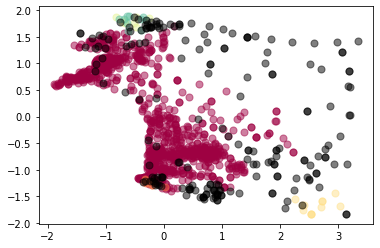

In [129]:
for i, col in zip(valores_etiquetas, colores):
    #Condicion para detectar valores atipicos
    if i==-1:
        col="k"
    puntos=(etiquetas==i)
    #Graficar puntos clasificados dentro del cluster
    pc=x[puntos&m]
    plt.scatter(pc[:,0],pc[:,1],s=50,c=[col],marker="o",alpha=0.5)
    #Graficar puntos atipicos
    pa=x[puntos&~m]
    plt.scatter(pa[:,0],pa[:,1],s=50,c=[col],marker="o",alpha=0.5)

Muestre el resultado de la clasificación añadiendo las etiquetas asignadas a los
registros en el dataset.


In [130]:
# Una forma de concatenar

In [131]:
y=etiquetas.reshape(-1,1) #pasar de forma de fila a columna

In [132]:
resultado=np.append(x,y,axis=1)#le une a manera de columna

In [133]:
resultado[0:5]

array([[-0.30440651, -1.16833902,  1.96990536,  2.08000987,  0.        ],
       [-0.32968379, -1.18518021,  1.84754897,  3.38792597,  1.        ],
       [-0.32854517, -1.18169137,  1.82715623,  3.48626553,  1.        ],
       [-0.34995115, -1.16773601,  1.91892353,  1.90955464,  0.        ],
       [-0.41895127, -1.15528818,  2.03108356,  0.4770751 ,  0.        ]])

In [134]:
df1=pd.DataFrame(resultado)
df1.head()

,0,1,2,3,4
0,-0.304407,-1.168339,1.969905,2.080010,0.0
1,-0.329684,-1.185180,1.847549,3.387926,1.0
2,-0.328545,-1.181691,1.827156,3.486266,1.0
3,-0.349951,-1.167736,1.918924,1.909555,0.0
4,-0.418951,-1.155288,2.031084,0.477075,0.0


In [135]:
# -1 identifica que es un valor atípico

In [136]:
#Otra forma de concatenar

In [137]:
df["cluster"]=etiquetas
df.head()

,Unnamed: 0,Nombre_Estacion,Latitud,Longitud,Temperatura-Media,Periodo-STM,Temperatura-Mensual-Max,Periodo-STMV,Temperatura-Mensual-Min,Periodo-STmV,Periodo-no-Nevado,Precipitación-Total,Periodo-SPV,Nivel-Nieve,Estacion-num,cluster
0,0,CHEMAINUS,48.935,-123.742,8.2,0.0,13.5,0.0,1.0,0.0,0.000000,178.8,0.0,0.000000,1011500,0
1,1,COWICHAN LAKE FORESTRY,48.824,-124.133,7.0,0.0,15.0,0.0,-3.0,0.0,0.000000,258.6,0.0,0.000000,1012040,1
2,2,LAKE COWICHAN,48.829,-124.052,6.8,13.0,16.0,9.0,-2.5,9.0,9.000000,264.6,9.0,30.512821,1012055,1
3,3,DUNCAN KELVIN CREEK,48.735,-123.728,7.7,2.0,14.5,2.0,-1.0,2.0,2.000000,168.4,2.0,30.512821,1012573,0
4,4,ESQUIMALT HARBOUR,48.432,-123.439,8.8,0.0,13.1,0.0,1.9,0.0,2.366534,81.0,8.0,30.512821,1012710,0
